In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NO2y1','NO2y2','NO2y3','year', 'month', 'day']]
Y1 = df['NO2']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=12)

In [10]:
grad_boost = GradientBoostingRegressor(n_estimators=2500,
                                      max_depth=6,
                                      max_features='sqrt',
                                      min_samples_split=3,
                                      min_samples_leaf=2,
                                      learning_rate=0.2)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=3,
                          n_estimators=2500)

In [11]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 1.0

Score on test data: -1.8045455548277913

Root Mean Squared Error: 28.433645577187296

Overall model accuracy: -1.8045455548277913


In [16]:
test=data.loc['207':'259']
X=test[['NO2y1','NO2y2','NO2y3','year', 'month', 'day']]
X

,NO2y1,NO2y2,NO2y3,year,month,day
207,76.847143,81.828571,83.730000,2019,12,29
208,52.067143,78.085714,67.225714,2020,1,5
209,58.215714,86.725714,57.842857,2020,1,12
210,58.545714,79.045714,75.028571,2020,1,19
211,44.648571,68.768571,68.434286,2020,1,26
212,49.550000,40.208571,62.091429,2020,2,2
213,50.381429,104.145714,66.960000,2020,2,9
214,72.708571,61.682857,67.874286,2020,2,16
215,73.708571,91.308571,82.401429,2020,2,23
216,88.330000,77.098571,62.438571,2020,3,1


In [17]:
predict=grad_boost.predict(X)

In [18]:
predict

array([76.32995434, 80.57155599, 67.46893465, 77.99148284, 72.409442  ,
       73.12973652, 56.36746975, 72.53598575, 77.42558302, 73.80108888,
       86.79768253, 86.87076457, 66.34708716, 61.65083689, 80.09432497,
       59.05225754, 67.58607689, 76.34364928, 66.07076673, 75.21102896,
       64.75307941, 56.22647804, 60.94812969, 66.18963216, 45.49494217,
       67.9974385 , 50.67545344, 64.67518673, 69.09398656, 36.50874499,
       27.94716539, 20.03831965, 16.41209581, 20.8123997 , 22.68419812,
       19.04512773, 18.06688103, 16.86371617, 24.47865447, 58.59438142,
       70.91964018, 84.202221  , 79.1804105 , 81.01134744, 51.63276564,
       76.6931147 , 80.29283321, 81.24445542, 66.86100826, 75.55053723,
       87.95875422, 63.71250573, 85.36717692])

In [19]:
dates=data.loc['207':'259','From Date']

In [20]:
X['From Date']=dates.values

In [21]:
X.columns

Index(['NO2y1', 'NO2y2', 'NO2y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [22]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [23]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [24]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [25]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

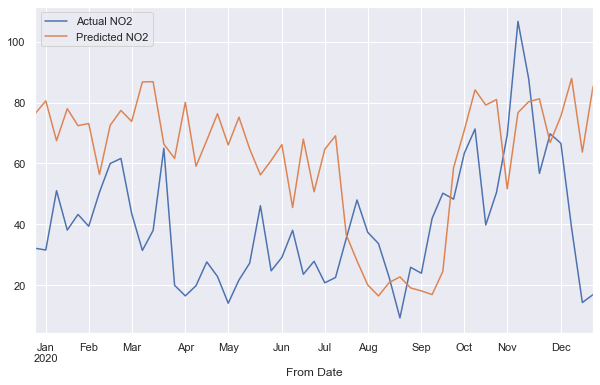

In [26]:
test['NO2'].plot(legend=True, label='Actual NO2', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO2')

In [27]:
np.sqrt(mean_squared_error(test['NO2'],X['pred']))

33.6976314412418

In [28]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 21.167120137330734
MSE: 808.4722008091027
RMSE: 28.433645577187296
R-Squared: -1.8045455548277913


In [29]:
mae = metrics.mean_absolute_error(test['NO2'],X['pred'])
mse = metrics.mean_squared_error(test['NO2'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO2'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 28.43200977027512
MSE: 1135.530364749768
RMSE: 33.6976314412418
R-Squared: -1.8961063709525794


In [30]:
import pickle
filename = 'NO2_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [31]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

-1.8045455548277913


# 3rd plot

In [32]:
testcase = pd.DataFrame()

In [33]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [34]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [35]:
testcase

,test,pred,Corrected
155,76.847143,76.847143,48.413497
156,52.067143,67.199055,38.765410
157,58.215714,71.667827,43.234181
158,58.545714,95.626684,67.193038
159,44.648571,66.624236,38.190591
160,49.550000,63.251280,34.817634
161,50.381429,59.634426,31.200781
162,72.708571,68.631259,97.064905
163,73.708571,79.490835,51.057190
164,88.330000,75.235835,103.669480


In [36]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [37]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.15627398019760086

In [38]:
test2020=pd.DataFrame()

In [39]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [40]:
test2020.index=test.index

In [41]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

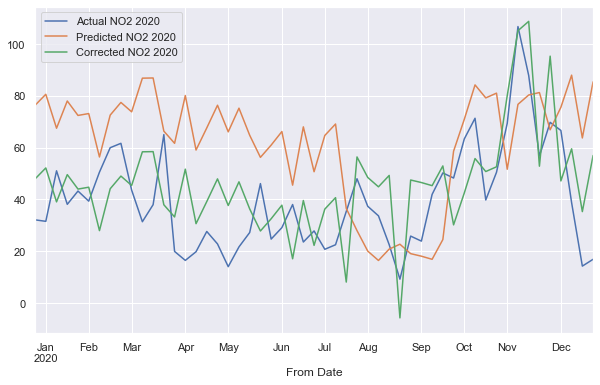

In [42]:
test2020['test'].plot(legend=True, label='Actual NO2 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO2 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO2 2020')

In [43]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.12512326560498266